# 📊 Data Analytics Portfolio
### My name is Ahmednur Abdi Yusuf

## 🗂 Project: Superstore Sales Analysis

**Objective**:  
Analyze sales data from a fictional superstore to uncover insights about performance across regions, product categories, and customer segments.

**Tools**:  
Python, Pandas, Matplotlib, Seaborn, numpy

**Dataset**:  
`Sample - Superstore.csv` from Kaggle

**— Import Libraries**:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for better visuals
sns.set(style="whitegrid")
%matplotlib inline

**— Load Dataset and Explore the Data**:

In [4]:
# Load the dataset
df = pd.read_csv("superstore_data.csv")

# Show first 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


**— DataFrame Summary**:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

### 📋 Column Data Type Review
As you can see from the DataFrame summary, some columns have data types that are not ideal for their contents. For example, date columns like `Order Date` and `Ship Date` are currently of type `object` (strings), but they should be converted to `datetime64` for proper date handling. Similarly, `Postal Code` is stored as a `float64`, which can cause issues since postal codes are better treated as strings (to preserve leading zeros and avoid numeric operations). Below is a review of key columns with suggested data types and explanations.



| **Column**        | **Data Type** | **Should It Be?**  | **Comments**                              |
|-------------------|---------------|--------------------|-----------------------------------------|
| `Row ID`          | `int64`       | ✅ Yes             | Numeric identifier, correct type        |
| `Order ID`        | `object`      | ✅ Yes             | IDs stored as strings, which is fine    |
| `Order Date`      | `object`      | ⚠️ No              | Should be `datetime64` for date operations |
| `Ship Date`       | `object`      | ⚠️ No              | Should be `datetime64`                   |
| `Ship Mode`       | `object`      | ✅ Yes             | Categories stored as strings             |
| `Customer ID`     | `object`      | ✅ Yes             | IDs as strings are appropriate          |
| `Customer Name`   | `object`      | ✅ Yes             | Names stored as strings                  |
| `Segment`         | `object`      | ✅ Yes             | Categories as strings                    |
| `Country`         | `object`      | ✅ Yes             | Country names as strings                 |
| `City`            | `object`      | ✅ Yes             | City names as strings                    |
| `State`           | `object`      | ✅ Yes             | State names as strings                   |
| `Postal Code`     | `float64`     | ⚠️ Maybe           | Should be string (postal codes not numeric) |
| `Region`          | `object`      | ✅ Yes             | Categories as strings                    |
| `Product ID`      | `object`      | ✅ Yes             | Product identifiers as strings          |
| `Category`        | `object`      | ✅ Yes             | Categories as strings                    |
| `Sub-Category`    | `object`      | ✅ Yes             | Categories as strings                    |
| `Product Name`    | `object`      | ✅ Yes             | Product names as strings                 |
| `Sales`           | `float64`     | ✅ Yes             | Numeric values for sales amount         |

---

**What we need to do:**

- Convert the `Order Date` and `Ship Date` columns from strings (`object` type) to proper datetime format so we can work with dates easily.
- Change the `Postal Code` column from a numeric type (`float64`) to a string type to preserve any formatting like leading zeros and avoid treating it as a number.

---

In [19]:
# Convert date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

# Convert Postal Code to string to preserve formatting
df['Postal Code'] = df['Postal Code'].astype('string')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   string        
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

**Look for:**

Missing values


In [22]:
# Check for null values
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

### 🔻 Removing Rows with Missing Postal Codes

There were 11 rows in the dataset with missing values in the `Postal Code` column.  
Since postal codes are important for regional analysis, we decided to drop these rows to avoid incomplete data issues.



In [23]:
# Drop rows where Postal Code is missing
df = df.dropna(subset=['Postal Code'])

In [26]:
# Check for null values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

### 📊 Using `df.describe()`

The `df.describe()` method generates **summary statistics** for the numeric columns in your DataFrame by default.

It includes:

- **count**: Number of non-missing values
- **mean**: Average value
- **std**: Standard deviation (measure of spread)
- **min**: Minimum value
- **25%**, **50% (median)**, **75%**: Percentiles
- **max**: Maximum value

In [27]:
df.describe()

,Row ID,Order Date,Ship Date,Sales
count,9789.000000,9789,9789,9789.000000
mean,4896.705588,2017-05-01 02:51:57.866993664,2017-05-05 01:56:03.898253056,230.116193
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,0.444000
25%,2449.000000,2016-05-23 00:00:00,2016-05-27 00:00:00,17.248000
50%,4896.000000,2017-06-26 00:00:00,2017-06-29 00:00:00,54.384000
75%,7344.000000,2018-05-15 00:00:00,2018-05-19 00:00:00,210.392000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,22638.480000
std,2827.486899,NaN,NaN,625.302079


## Business Questions

| **Business Question**               | **Python Approach**                       |
|-----------------------------------|-----------------------------------------|
| What are the total sales?          | `df['Sales'].sum()`                      |
| What are monthly sales trends?     | Group by month on `Order Date`           |
| What are top regions by sales?     | Group by `Region` and sum `Sales`        |
| What are top states by sales?      | Group by `State` and sum `Sales`         |
| What are top-selling categories?  | Group by `Category` and sum `Sales`      |
| Who are the top 10 customers?     | Group by `Customer Name` and sum `Sales` |

---

In [31]:
# Total sales
total_sales = df['Sales'].sum()
print(total_sales)

2252607.4127


In [33]:
# Monthly sales trends
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
print(monthly_sales)

Order Date
2015-01     14205.7070
2015-02      4519.8920
2015-03     55205.7970
2015-04     27906.8550
2015-05     23644.3030
2015-06     34322.9356
2015-07     33781.5430
2015-08     27117.5365
2015-09     81623.5268
2015-10     31453.3930
2015-11     77907.6607
2015-12     68167.0585
2016-01     18066.9576
2016-02     11951.4110
2016-03     32339.3184
2016-04     34154.4685
2016-05     29959.5305
2016-06     23599.3740
2016-07     28608.2590
2016-08     36818.3422
2016-09     63133.6060
2016-10     31011.7375
2016-11     70129.2995
2016-12     74543.6012
2017-01     16870.1810
2017-02     22978.8150
2017-03     51165.0590
2017-04     37385.0170
2017-05     56656.9080
2017-06     39724.4860
2017-07     38320.7830
2017-08     30542.2003
2017-09     69193.3909
2017-10     59583.0330
2017-11     79066.4958
2017-12     95739.1210
2018-01     42839.2940
2018-02     19920.9974
2018-03     58863.4128
2018-04     35541.9101
2018-05     43825.9822
2018-06     48190.7277
2018-07     44825.1040


In [34]:
# Top regions by sales
top_regions = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print(top_regions)

Region
West       710219.6845
East       660589.3560
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64


In [35]:
# Top states by sales
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
print(top_states)

State
California              446306.4635
New York                306361.1470
Texas                   168572.5322
Washington              135206.8500
Pennsylvania            116276.6500
Florida                  88436.5320
Illinois                 79236.5170
Michigan                 76136.0740
Ohio                     75130.3500
Virginia                 70636.7200
North Carolina           55165.9640
Indiana                  48718.4000
Georgia                  48219.1100
Kentucky                 36458.3900
Arizona                  35272.6570
New Jersey               34610.9720
Colorado                 31841.5980
Wisconsin                31173.4300
Tennessee                30661.8730
Minnesota                29863.1500
Massachusetts            28634.4340
Delaware                 27322.9990
Maryland                 23705.5230
Rhode Island             22525.0260
Missouri                 22205.1500
Oklahoma                 19683.3900
Alabama                  19510.6400
Oregon                

In [36]:
# Top categories by sales
top_categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(top_categories)

Category
Technology         825856.1130
Furniture          723538.4757
Office Supplies    703212.8240
Name: Sales, dtype: float64


In [37]:
# Top 10 customers by sales
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_customers)

Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


## Data Visualization

Visualizations help us:
- Understand trends and patterns over time
- Compare sales across regions, categories, and customers
- Detect outliers and variability in the data
- Communicate findings clearl

---

### 📊 Visualizations to Create

| # | **Chart Title**                   | **Purpose**                                | **Chart Type**         |
|---|-----------------------------------|--------------------------------------------|------------------------|
| 1 | Monthly Sales Trend               | Show how sales change over time            | Line plot              |
| 2 | Top Regions by Sales              | Compare sales performance by region        | Bar chart              |
| 3 | Top States by Sales               | Compare sales performance by state         | Bar chart              |
| 4 | Top Categories by Sales           | See which product categories perform best  | Bar chart              |
| 5 | Top 10 Customers by Sales         | Identify the highest-spending customers    | Horizontal bar chart   |
| 6 | Sales Distribution                | Analyze spread and outliers in sales data  | Histogram              |

### 1️⃣ Monthly Sales Trend

This line plot shows how total sales change month by month.  
It helps identify overall trends, seasonality, or spikes in sales over time.

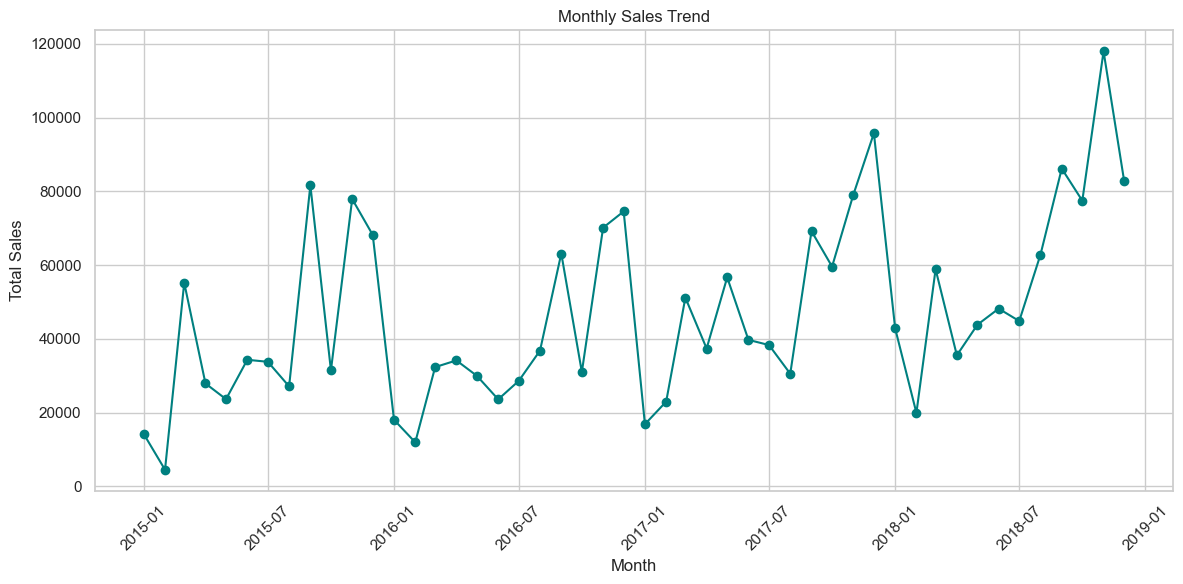

In [38]:
import matplotlib.pyplot as plt

# Ensure 'Order Date' is datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by month and sum sales
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()  # Convert Period to datetime for plotting

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='teal')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2️⃣ Top Regions by Sales

This bar chart shows total sales grouped by region.  
It helps compare how different geographical regions perform in terms of revenue.

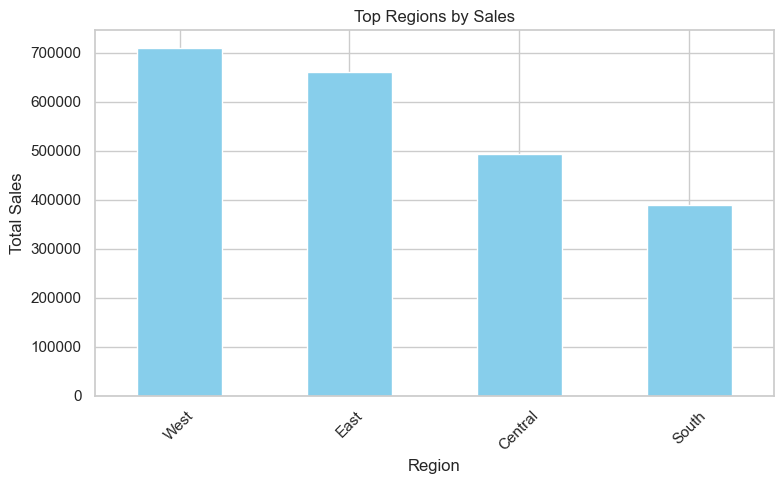

In [39]:
top_regions = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

top_regions.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Top Regions by Sales')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3️⃣ Top States by Sales

This bar chart shows the total sales across all U.S. states in the dataset.  
It helps identify high-performing and underperforming states.

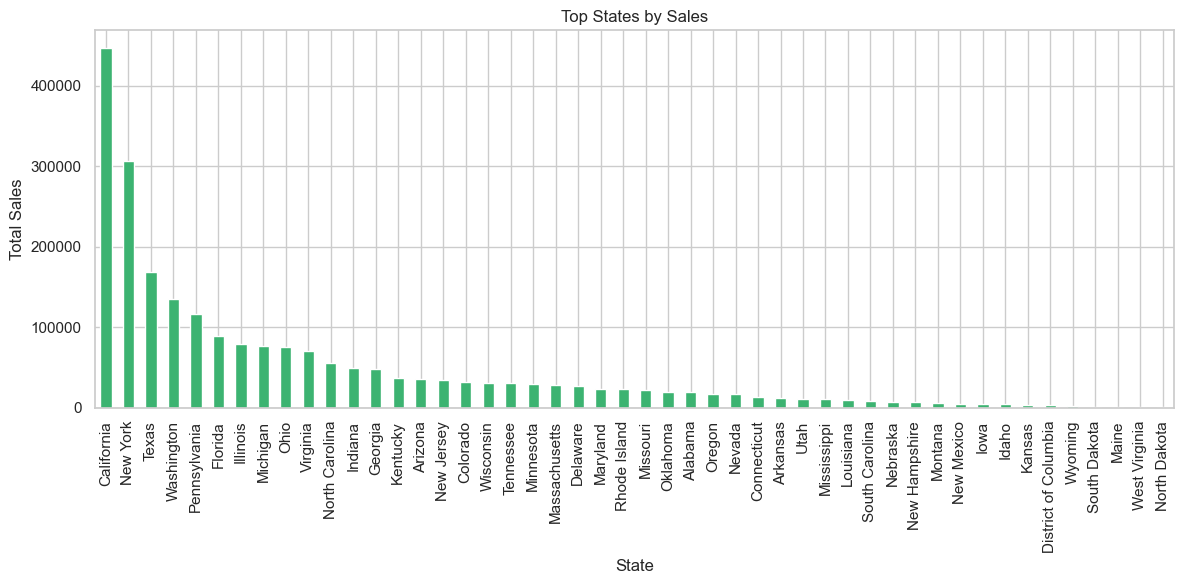

In [40]:
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
top_states.plot(kind='bar', color='mediumseagreen')
plt.title('Top States by Sales')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 4️⃣ Top Categories by Sales

This bar chart displays sales grouped by product category.  
It highlights which product categories generate the most revenue.

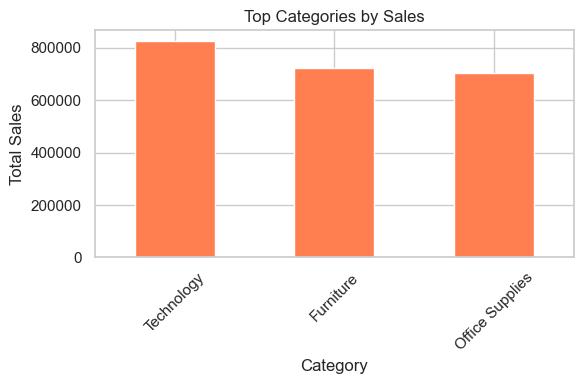

In [41]:
top_categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

top_categories.plot(kind='bar', color='coral', figsize=(6, 4))
plt.title('Top Categories by Sales')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5️⃣ Top 10 Customers by Sales

This horizontal bar chart shows the 10 customers who contributed the most to overall sales.  
It helps identify key clients for the business.

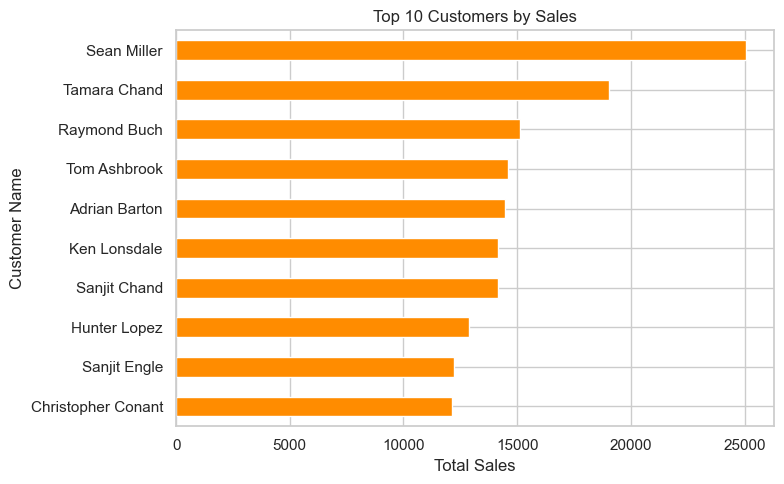

In [42]:
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

top_customers.plot(kind='barh', color='darkorange', figsize=(8, 5))
plt.title('Top 10 Customers by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.show()

### 6️⃣ Sales Distribution

This histogram shows the distribution of individual sales values.  
It helps identify common sale amounts, outliers, and skew in the data.

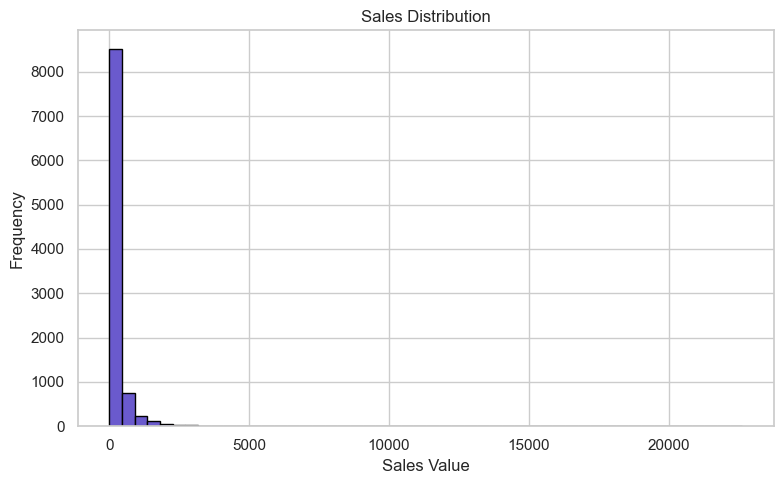

In [43]:
plt.figure(figsize=(8, 5))
plt.hist(df['Sales'], bins=50, color='slateblue', edgecolor='black')
plt.title('Sales Distribution')
plt.xlabel('Sales Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## 📊 Business Summary

This sales data analysis provided valuable insights into company performance through descriptive statistics, data aggregation, and visual exploration:

1. **Monthly Sales Trend**  
   - Analysis of sales over time revealed seasonal patterns and fluctuations, helping to identify peak periods and potential growth opportunities.

2. **Top Regions and States by Sales**  
   - Certain regions and states demonstrated significantly higher sales volumes, highlighting key geographic markets for strategic focus and resource allocation.

3. **Top Categories by Sales**  
   - Sales performance varied across product categories, providing direction for product prioritization and marketing efforts.

4. **Top 10 Customers**  
   - A small subset of customers accounted for a disproportionate share of sales, emphasizing the importance of targeted customer relationship management.

5. **Sales Distribution**  
   - The distribution of individual sales values showed a right-skewed pattern, indicating many smaller transactions alongside fewer high-value sales.

---

### Statistical Approach

- The analysis primarily employed **descriptive statistics** and **aggregations** to summarize data and identify trends.
- Visualizations were used to support these findings and provide intuitive, actionable insights.
- No inferential statistical tests or predictive models were applied at this stage, though these could be explored in further analysis to deepen understanding.

---

These insights can guide data-driven decision-making across marketing, sales strategy, customer engagement, and geographic expansion.
